# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [7]:
# Download otomatis dari repo publik
!kaggle datasets download yasserh/wine-quality-dataset
!unzip -o wine-quality-dataset.zip
url = "WineQT.csv"
df = pd.read_csv(url)

# Lihat 5 baris pertama
print(df.head())

Dataset URL: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
License(s): CC0-1.0
wine-quality-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  wine-quality-dataset.zip
  inflating: WineQT.csv              
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0            

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \

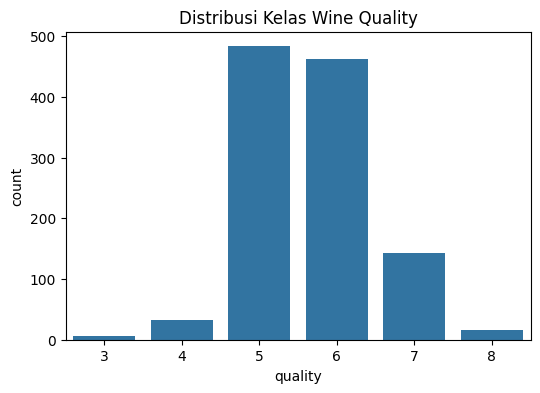

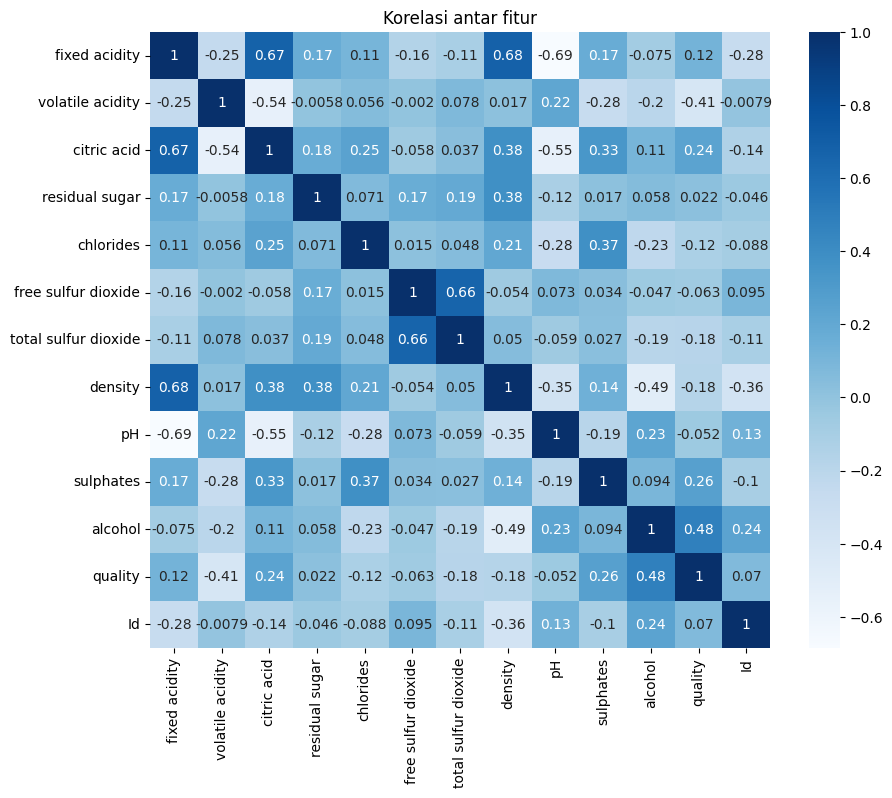

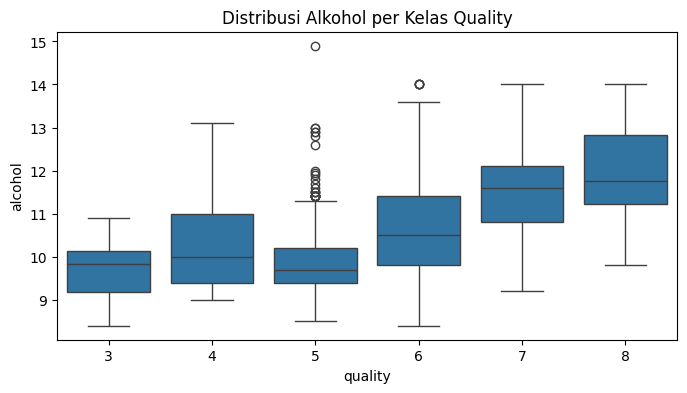

In [8]:
# Info dataset
print(df.info())
print(df.describe())

# Cek missing value
print("Missing values per kolom:")
print(df.isnull().sum())

# Distribusi kelas (quality)
print("Distribusi kelas quality:")
print(df['quality'].value_counts())

# Visualisasi distribusi kelas
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df)
plt.title("Distribusi Kelas Wine Quality")
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Korelasi antar fitur")
plt.show()

# Visualisasi fitur utama
plt.figure(figsize=(8,4))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Distribusi Alkohol per Kelas Quality")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
# 1. Menghapus data duplikat
df = df.drop_duplicates()
print("Jumlah data setelah menghapus duplikat:", len(df))

# 2. Menangani missing value (jika ada)
df = df.dropna()
print("Jumlah data setelah menghapus missing value:", len(df))

# 3. Normalisasi fitur numerik
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=np.number).columns.drop('quality')
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 4. Encoding label (jika ingin klasifikasi biner, misal: kualitas baik vs buruk)
df['label'] = (df['quality'] >= 6).astype(int)  # 1: baik, 0: buruk

# 5. Split data untuk training dan testing
from sklearn.model_selection import train_test_split
X = df[num_cols]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Distribusi label di train:", np.bincount(y_train))
print("Distribusi label di test:", np.bincount(y_test))

Jumlah data setelah menghapus duplikat: 1143
Jumlah data setelah menghapus missing value: 1143
Shape X_train: (914, 12)
Shape X_test: (229, 12)
Distribusi label di train: [420 494]
Distribusi label di test: [102 127]
